# Rampa in T del GaSb

Per la prima temperatura  $T_1=78.68$  K si raccoglie lo spettro a 6 diverse intensità [0e5, 1, 2e5, 5, 10, 25]

In [1]:
arr_filtro = ['0e5', '1', '2e5', '5', '10', '25'] # + 'pc'

Per ciascuna delle successive 20 temperature, si raccoglie lo spettro con filtro 0e5.

In [2]:
arr_T = ['78e68', '90', '100', '110', '120', '130', '140', '150', '160', '170', '180',
      '190', '200', '210', '220', '230', '240', '250', '260', '280', '300'] # + 'K'

## Importazioni

In [3]:
from qp2_subroutines import *
import os

In [4]:
os.getcwd() 

'/Users/zosojack/lab-ss/QP2'

## Preliminari

Per la costruzione dei nomi dei file

In [5]:
def build_name_GaSb (T: str = None, filtro: str = None):
    # t_acq == 0e1
    # n_acq == 4
    # grating == 35lmm
    # ecc=None
    fen='fen1e1'
    
    if T is None:
        T = '78e68'
    if filtro is None:
        filtro = '0e5'
    
    cartella = 'data/rampa_T_GaSb/'
    name = 'Giak_' + '0e1_4_35lmm_' + T + 'K_' + filtro + 'pc_' + fen + '.asc'
    
    return cartella+name

Per il fit: opto per la somma di N gaussiane.

Il vettore params viene definito come una list di N triple (a, mu, sigma), una per ciascuna gaussiana. Successivamente deve essere 'appiattito' con .flatten() per renderlo un array unidimensionale, trattabile da curve_fit().

In [6]:
def N_gaussiane (x, *params):
    # Inizializzo il risultato
    y = np.zeros_like(x)
    # Sommo una gaussiana per ciascuna entrata della list
    for i in range(0, len(params), 3):  # Scandisco i parametri a gruppi di 3
        A, mu, sigma = params[i], params[i+1], params[i+2]
        y += gaussiana(x, A, mu, sigma)
        
    return y

Servirà dopo per i colori nei grafici.

In [7]:
col = ['red', 'green', 'magenta', 'purple', 'peru', 'cyan', 
       'olive', 'goldenrod', 'black', 'sienna', 'steelblue', 'crimson']

Fare caso al fatto che fit_N_gaussiane prende in argomento il numero di acquisizioni! Il motivo è spiegato bene nella docstring. In breve: serve a correggere con un senso l'errore poissoniano!

---

---

# Analisi

In una prima fase abbiamo anche verificato che 0e1 fosse il tempo di acquisizione ottimale, si potrebbe inserire nell'analisi.

## GaSb: T=79K su INTENSITÀ

#### Contenitore per i dati

In [8]:
# dictionary GaSb
# le keys saranno i filtri
# ciascuna key conterrà le due colonne del file:
# GaSb[filtro][0] - colonna 0 del file (lunghezze d'onda)
# GaSb[filtro][1] - colonna 1 del file (counts)

GaSb_flt = {}

#### Lettura file

In [9]:
for filtro in arr_filtro:
    
    # Costruisco nome file
    name = build_name_GaSb (filtro=filtro)
    # Estraggo i dati 
    waveln, counts = leggi_file_asc (name)
    # Pulisco i counts da valori insensati
    counts = clean_counts (counts)
    # Raccolgo
    GaSb_flt[filtro] = (waveln, counts)

#### Plot su intensità + FIT somma Gaussiane

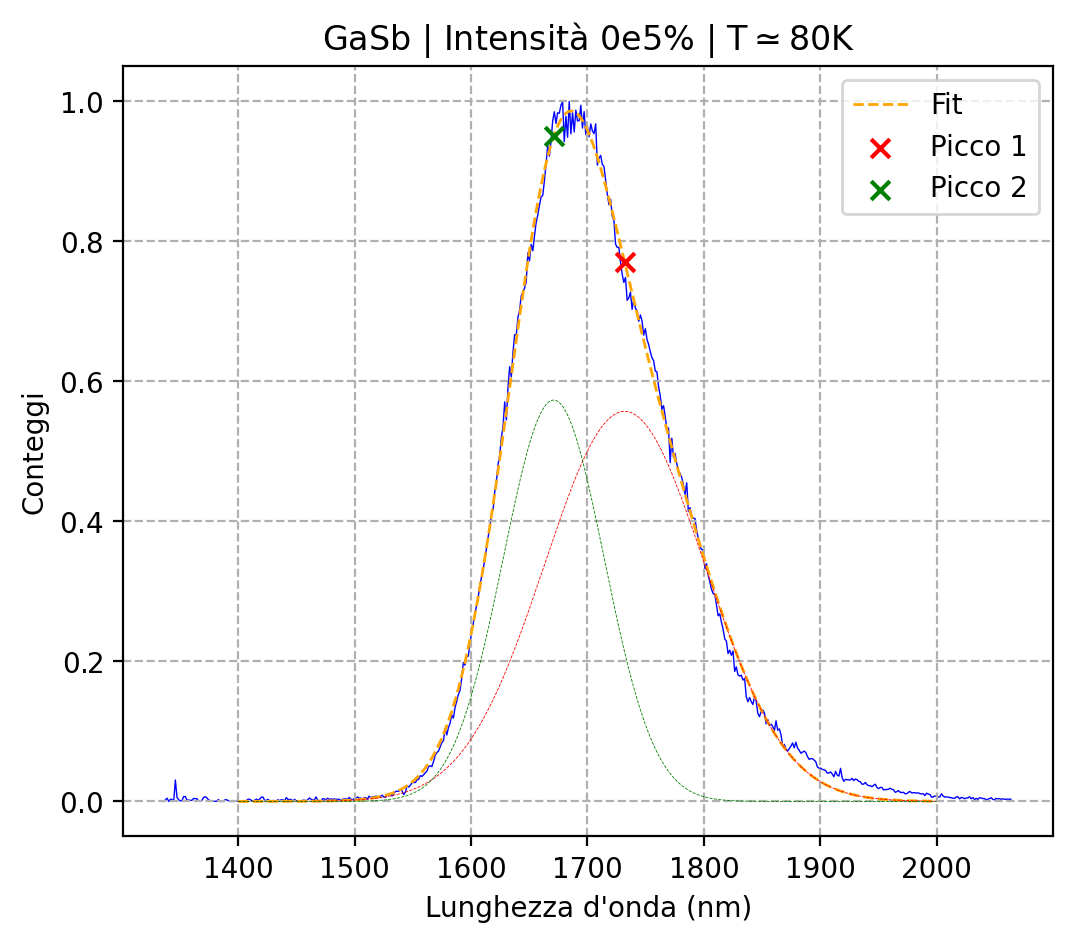

• Gaussiana  1
 - A = 0.5572994546480672
 - mu = 1731.9200922044945
 - sigma = 68.87723397732894
• Gaussiana  2
 - A = 0.5733801945825098
 - mu = 1671.0287541853108
 - sigma = 43.306063144215706
 - chi2rid = 0.6055846907867474


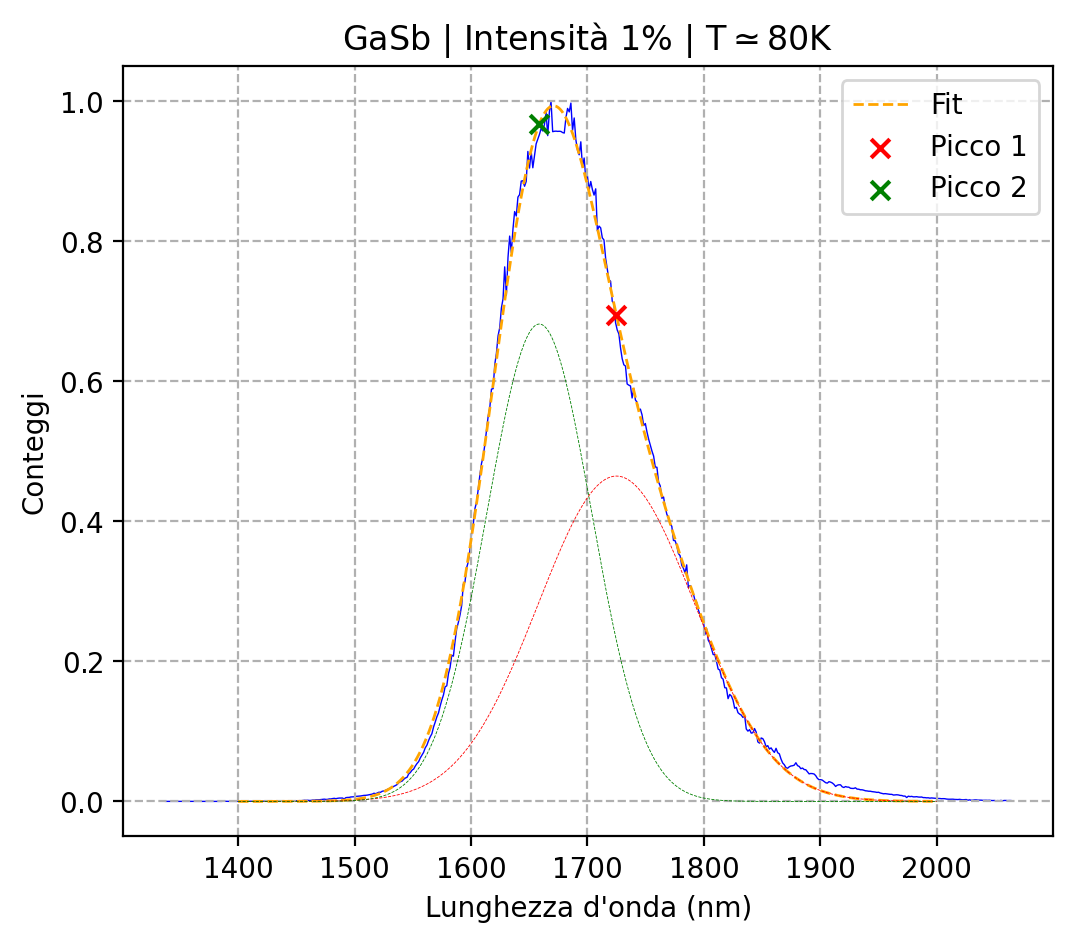

• Gaussiana  1
 - A = 0.46484907796235486
 - mu = 1724.933764866435
 - sigma = 67.22521613028874
• Gaussiana  2
 - A = 0.6820190293678503
 - mu = 1658.6871022123823
 - sigma = 44.878533488445015
 - chi2rid = 0.45305567174474365


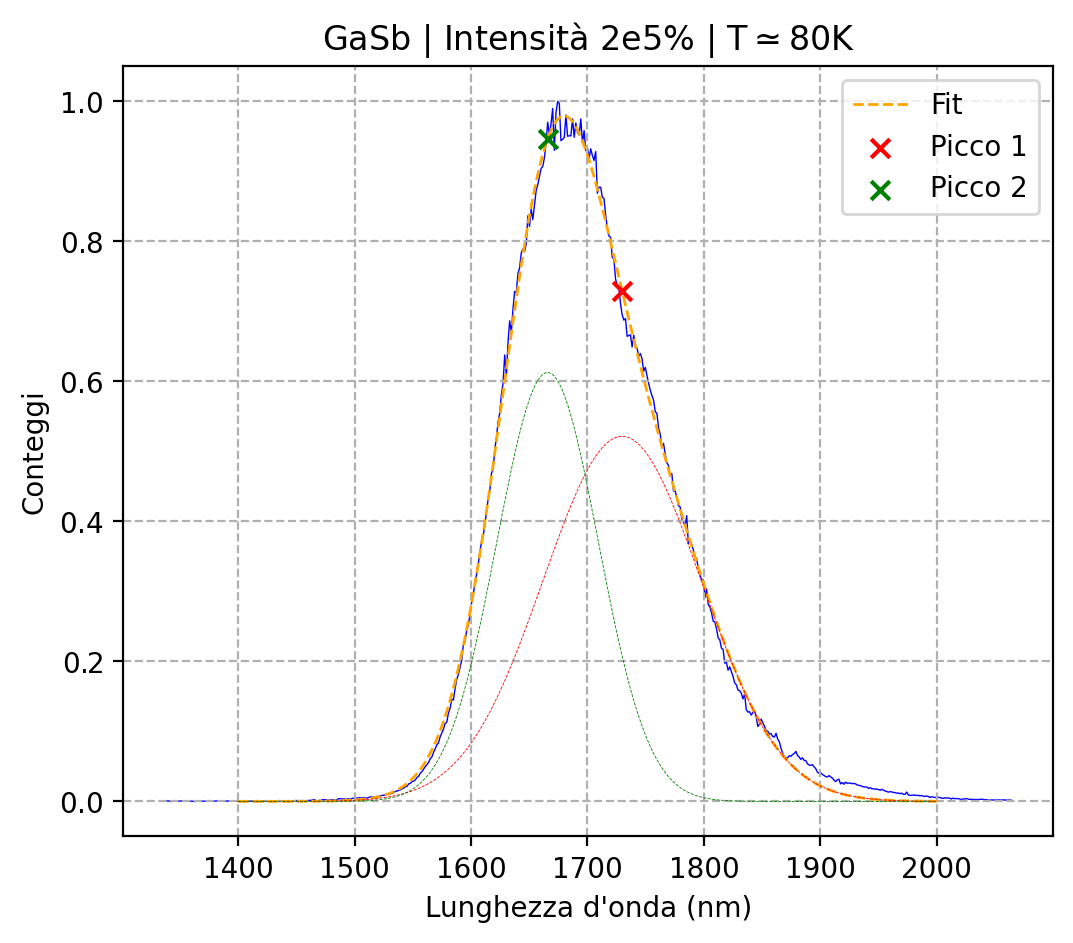

• Gaussiana  1
 - A = 0.5216348462352766
 - mu = 1729.7656585209852
 - sigma = 67.73813519499151
• Gaussiana  2
 - A = 0.6128070278791703
 - mu = 1665.802588696487
 - sigma = 43.49322818976289
 - chi2rid = 0.5076285135434713


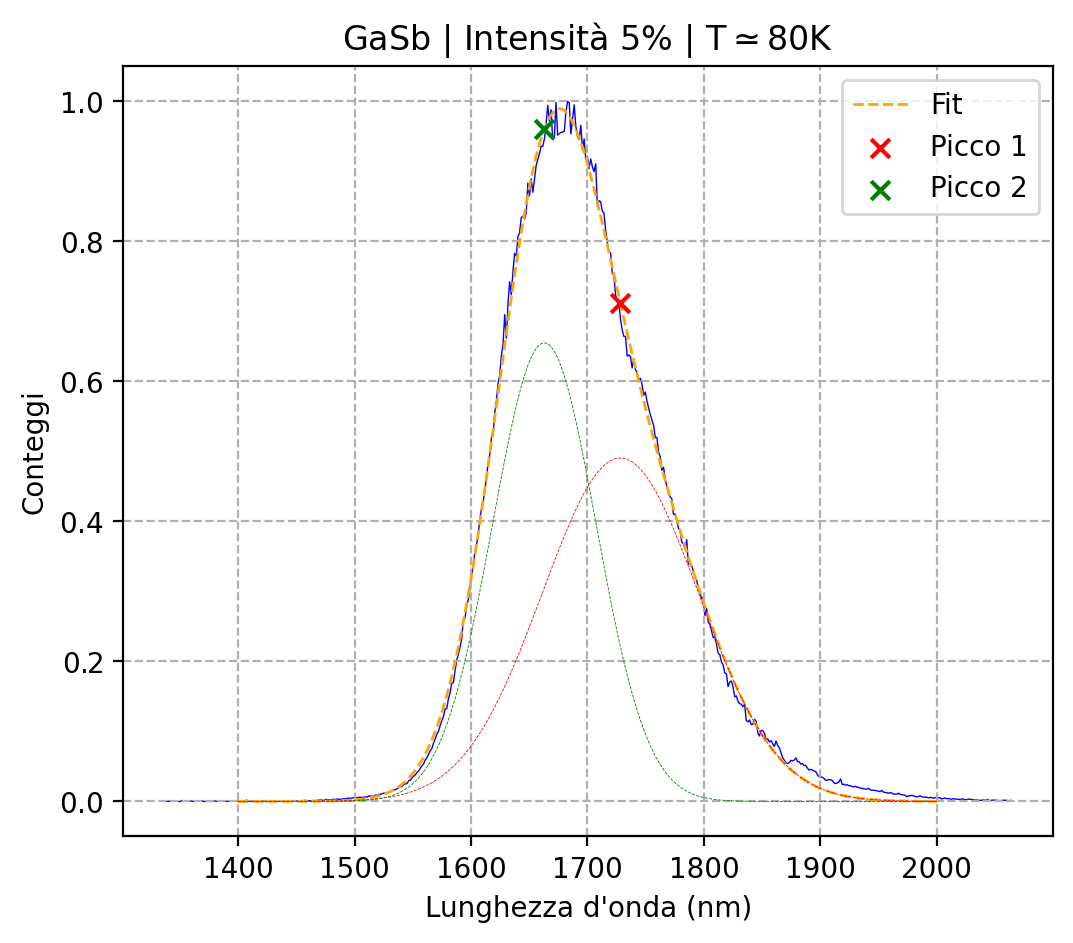

• Gaussiana  1
 - A = 0.4905477468512206
 - mu = 1728.3019690006079
 - sigma = 67.14629768938632
• Gaussiana  2
 - A = 0.6550653110900996
 - mu = 1662.9867071756512
 - sigma = 44.32685140161153
 - chi2rid = 0.48315479131993955


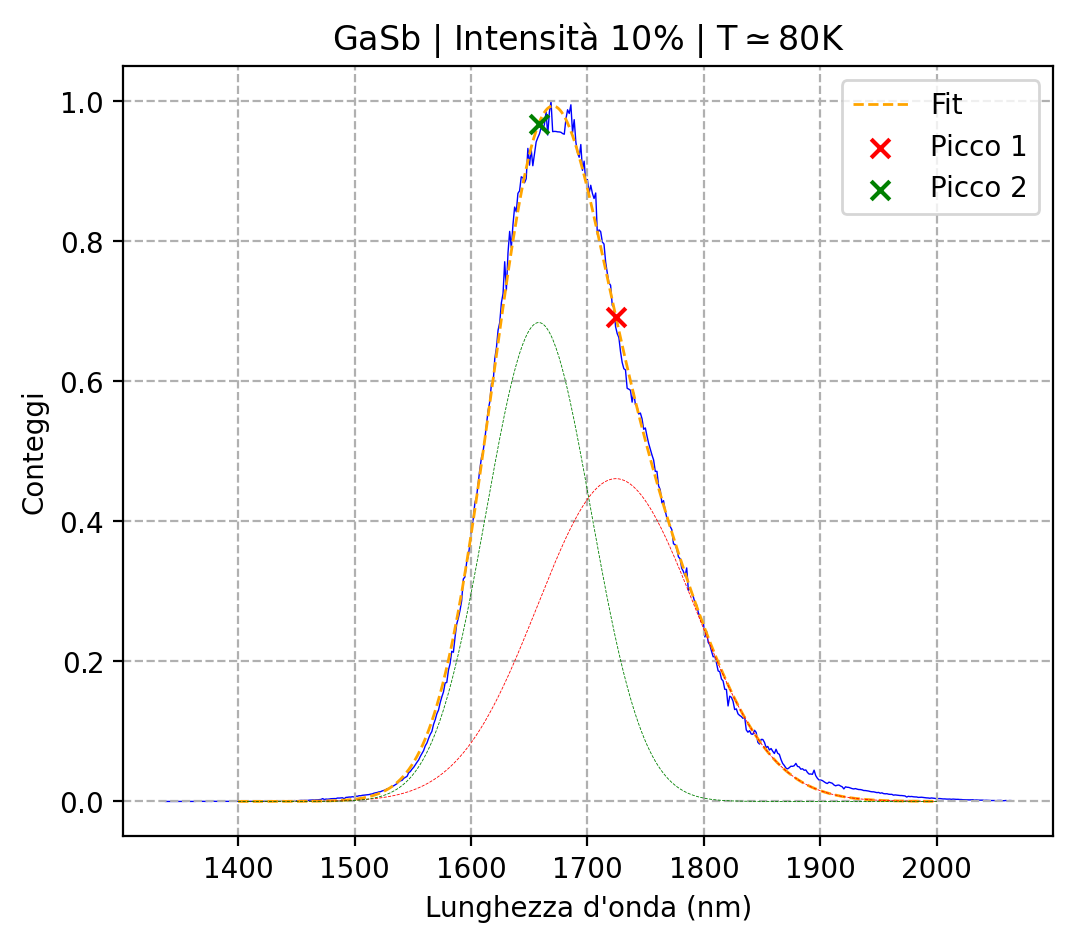

• Gaussiana  1
 - A = 0.4611379972859418
 - mu = 1724.4306819244757
 - sigma = 67.32587238684495
• Gaussiana  2
 - A = 0.6841564333324732
 - mu = 1658.1654750407874
 - sigma = 44.97902187650781
 - chi2rid = 0.4532264984372262


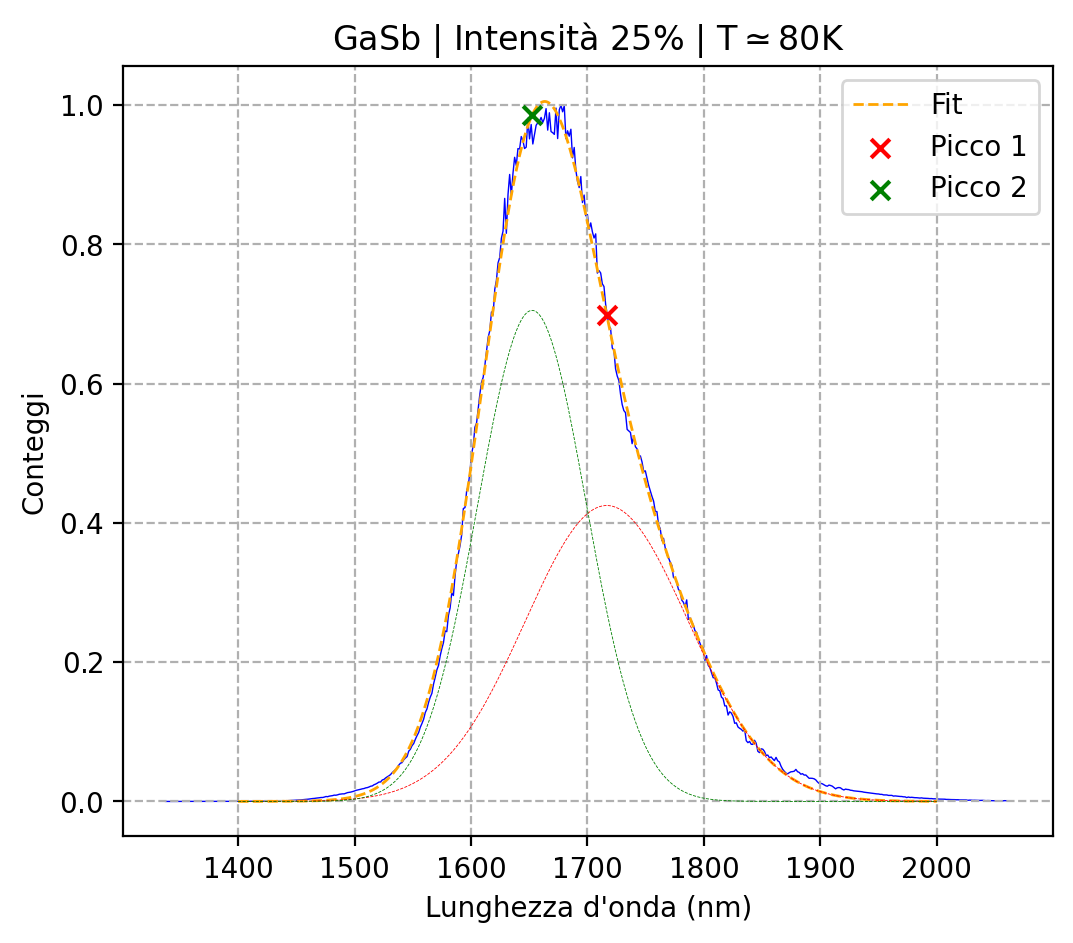

• Gaussiana  1
 - A = 0.4250568792884047
 - mu = 1716.5815381341597
 - sigma = 70.2867878453595
• Gaussiana  2
 - A = 0.7052836348758976
 - mu = 1652.4786953594655
 - sigma = 46.551426540681256
 - chi2rid = 0.3987887449502435


In [10]:

for filtro in arr_filtro:
    
    waveln = GaSb_flt[filtro][0]
    counts = GaSb_flt[filtro][1]
    
    # normalizzo i counts
    maximum = np.max(counts)
    counts = counts / maximum

    # Plot
    plt.figure(figsize=(6,5), dpi=200)
    plt.plot(waveln, counts, linestyle='-', color='b', linewidth=0.5, zorder=1)
    
    ## FIT ##
    
    # isolo regione 1400 < x < 2000
    mask = (waveln > 1400) & (waveln < 2000)
    x_fit = waveln[mask]
    y_fit = counts[mask]
    
    # impostazione parametri: ogni entrata è una tripla (a, mu, sigma)
    params = [
        (1, 1700, 50)
    ]
    
    # Set dei bounds
    low = [0, 1500, 10] * len(params)  # Es: A >= 0, mu >= 1500, sigma >= 10
    upp = [1, 1900, 200] * len(params)  # Limiti superiori
    
    popt, pcov, chi2_reduced = fit_N_gaussiane(x_fit, y_fit, params, bounds=(low,upp))
        
    ## PLOT CURVA FIT ##
    x_plot = np.linspace(1400, 2000, 500)
    y_plot = N_gaussiane(x_plot, *popt)
    plt.plot(x_plot, y_plot, linestyle='--', color='orange', label=f"Fit", linewidth=1, zorder=2)
        
    # plotto i picchi individuati dal fit
    for i in range(0, round(len(popt)/3)): 
        x_picco = popt[3*i+1]
        # questo dà come ordinata al marker il valore della gaussiana in quella x
        y_picco = N_gaussiane(x_picco, *popt)
        # questo invece gli dà l'ampiezza del picco estratta dal fit (è orribile)
        # y_picco = popt[3*i]
        
        plt.scatter(x_picco, y_picco, 
                    color=col[i], 
                    marker='x',
                    label='Picco '+str(i+1),
                    s=45,
                    zorder=3
                    )
        
    # plotto singolarmente le gaussiane
    for i in range(0, round(len(popt)/3)):
        y_gauss = gaussiana(x_plot, popt[3*i], popt[3*i+1], popt[3*i+2])
        plt.plot(x_plot, y_gauss, linestyle='--', color=col[i], linewidth=0.3, zorder=2)
    
    ## OPZIONI GRAFICHE ##
    plt.title(r'GaSb | Intensità ' + filtro + '% | T$\simeq80$K')
    plt.xlabel("Lunghezza d'onda (nm)")
    plt.ylabel("Conteggi")
    plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
    plt.legend()
    plt.grid(linestyle='--')
    #plt.tight_layout()
    plt.show()
    
    
    ## PRINT RISULTATI FIT ##
    for i in range(0, round(len(popt)/3)):
        print('• Gaussiana ', i+1)
        print(' - A =', popt[3*i])
        print(' - mu =', popt[3*i+1])
        print(' - sigma =', popt[3*i+2])
    print(' - chi2rid =', chi2_reduced)

---

---

## GaSb: filtro=0e5pc su TEMPERATURA

#### Contenitore per i dati

In [11]:
# dictionary GaSb
# le keys saranno i filtri
# ciascuna key conterrà le due colonne del file:
# GaSb[filtro][0] - colonna 0 del file (lunghezze d'onda)
# GaSb[filtro][1] - colonna 1 del file (counts)

GaSb_T = {}

#### Lettura file

In [12]:
for T in arr_T:
    
    # Costruisco nome file
    name = build_name_GaSb (T=T)
    # Estraggo i dati 
    waveln, counts = leggi_file_asc (name)
    # Pulisco i counts da valori insensati
    counts = clean_counts (counts)
    # Raccolgo
    GaSb_T[T] = (waveln, counts)

#### Plot su temperatura

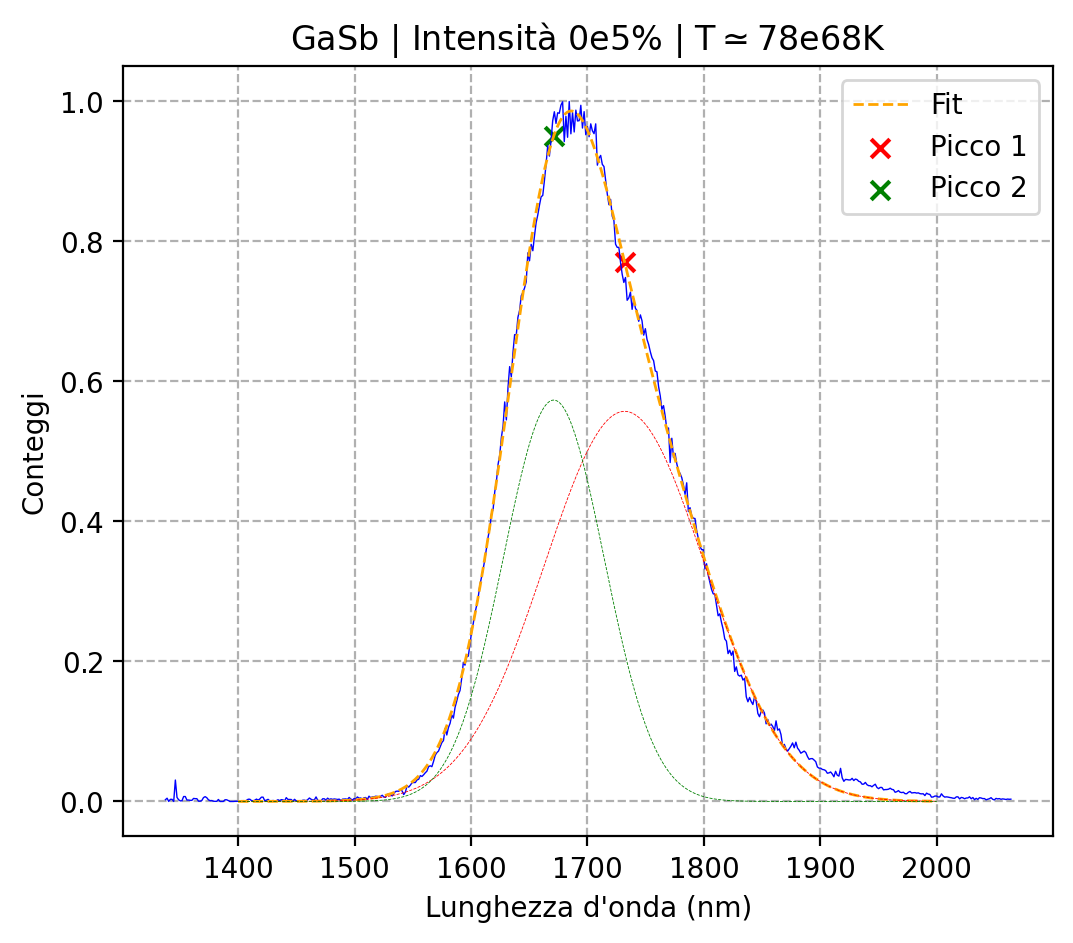

• Gaussiana  1
 - A = 0.5572934770954937
 - mu = 1731.920840801175
 - sigma = 68.8771075073376
• Gaussiana  2
 - A = 0.5733880925954329
 - mu = 1671.0288817668365
 - sigma = 43.306307672720486
 - chi2rid = 0.6055826142882942


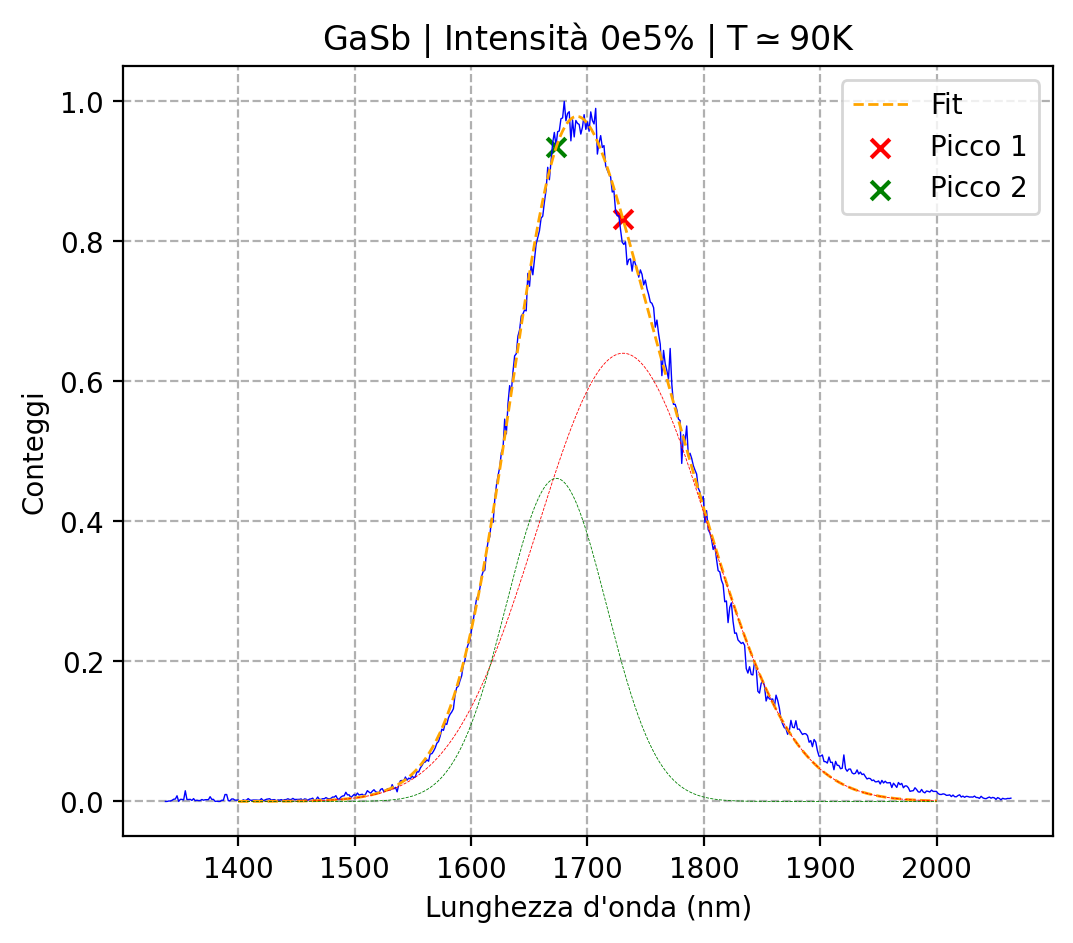

• Gaussiana  1
 - A = 0.64032824165327
 - mu = 1730.628498142865
 - sigma = 73.8330188162489
• Gaussiana  2
 - A = 0.4614795345234237
 - mu = 1673.2706588965268
 - sigma = 43.18490333699563
 - chi2rid = 0.6825462877091807


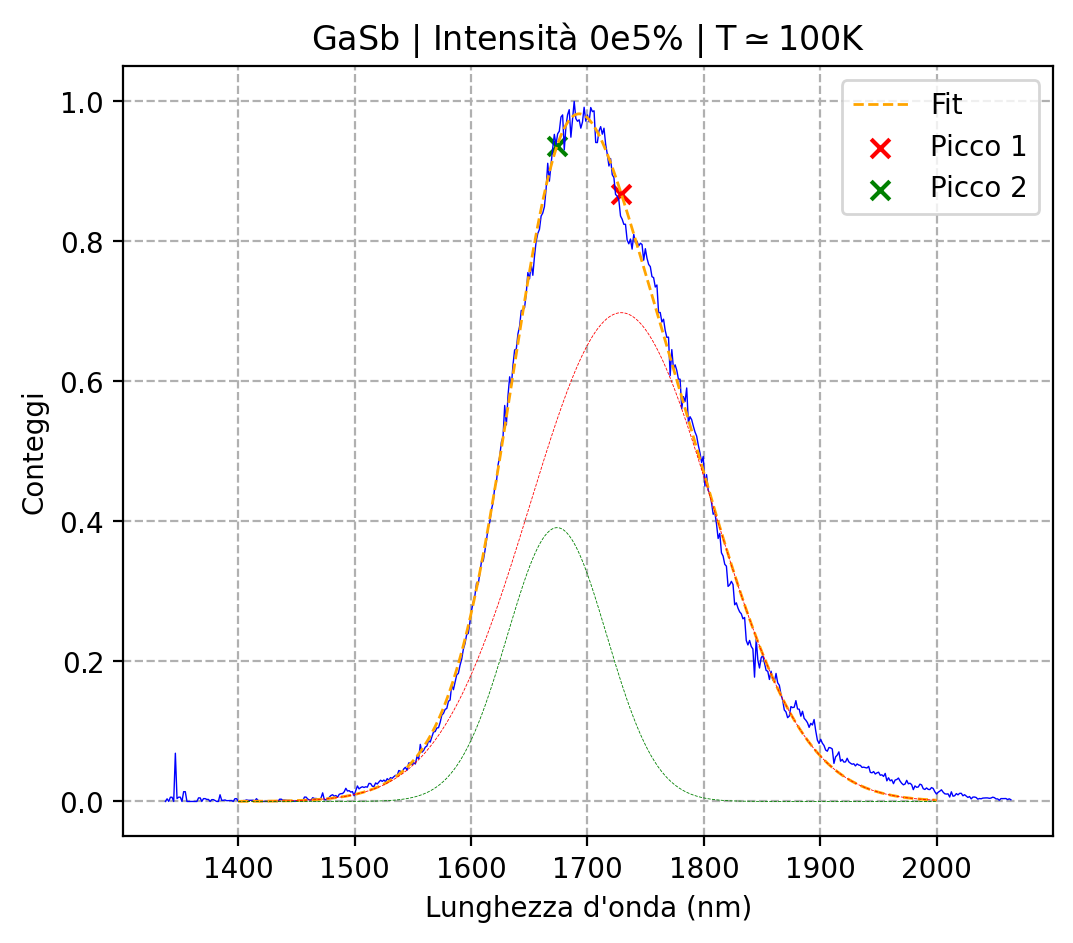

• Gaussiana  1
 - A = 0.6982343841745485
 - mu = 1729.0401539962784
 - sigma = 78.44558905444947
• Gaussiana  2
 - A = 0.39112932241945725
 - mu = 1673.9406854553638
 - sigma = 42.67777961691682
 - chi2rid = 0.677764646720234


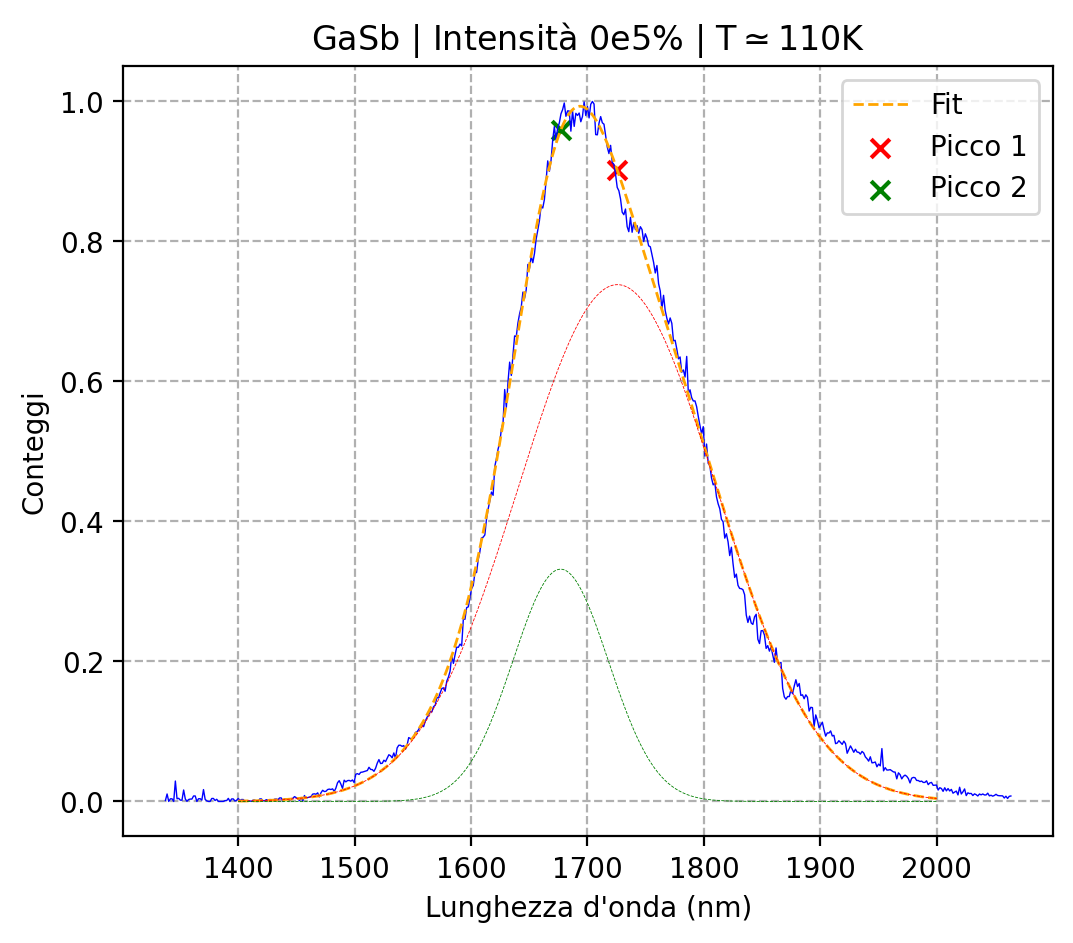

• Gaussiana  1
 - A = 0.7382970825422346
 - mu = 1725.7574381763297
 - sigma = 85.24274946220993
• Gaussiana  2
 - A = 0.3317893001474452
 - mu = 1676.984659354199
 - sigma = 40.93094385712379
 - chi2rid = 0.7099540212641122


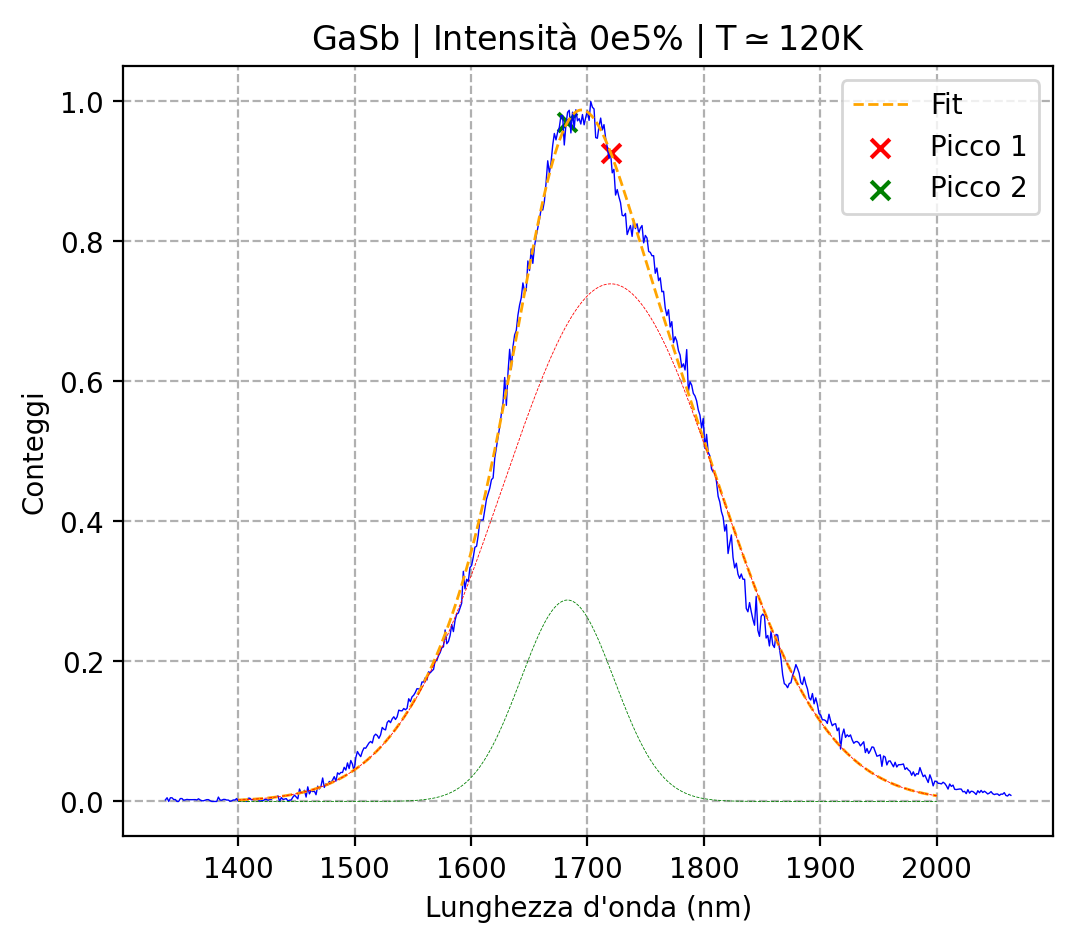

• Gaussiana  1
 - A = 0.7394348186120219
 - mu = 1720.1188465526375
 - sigma = 93.10724703225958
• Gaussiana  2
 - A = 0.28771921598482214
 - mu = 1682.8411687076166
 - sigma = 40.09188907059281
 - chi2rid = 0.7974625046554801


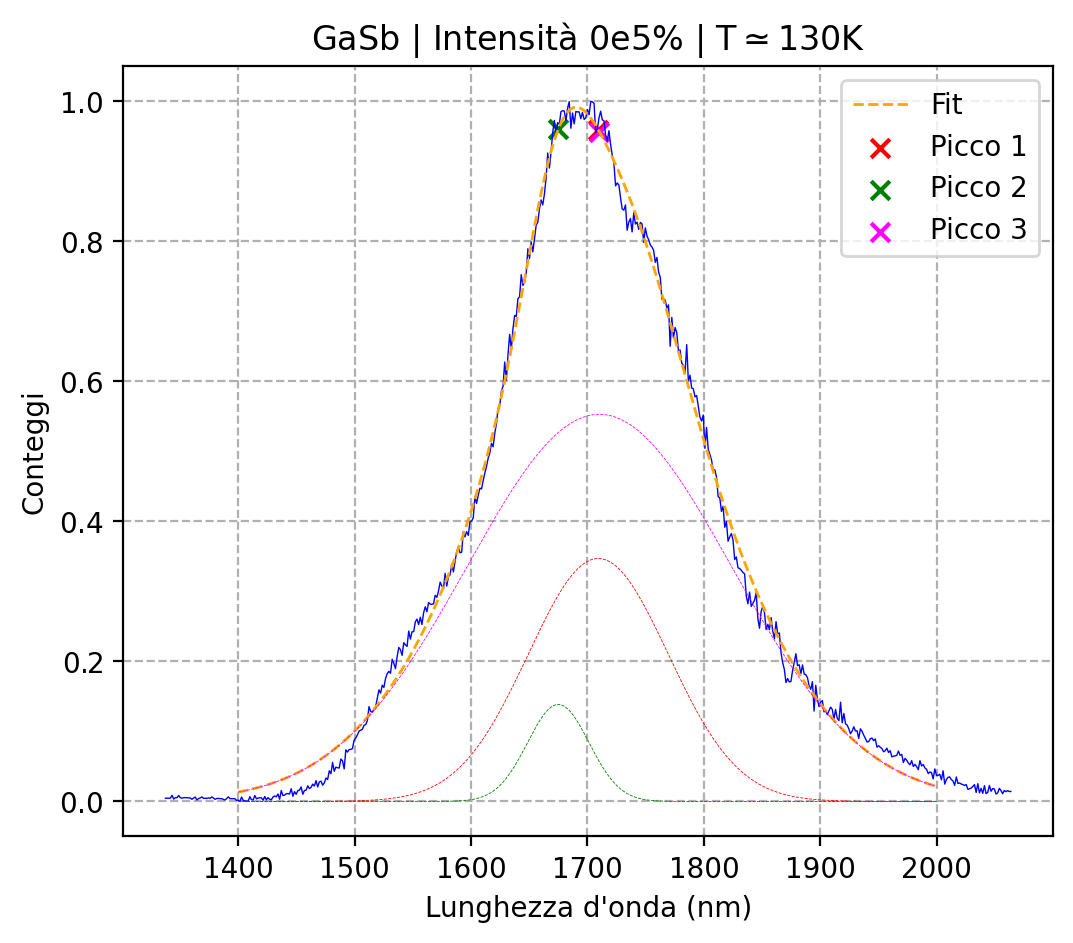

• Gaussiana  1
 - A = 0.34707217260616197
 - mu = 1709.3284433878387
 - sigma = 60.064175991384815
• Gaussiana  2
 - A = 0.13855377827838875
 - mu = 1674.968653767565
 - sigma = 26.415236192480247
• Gaussiana  3
 - A = 0.5530479439432338
 - mu = 1710.2181099683417
 - sigma = 113.61864811230363
 - chi2rid = 4.335839953872006


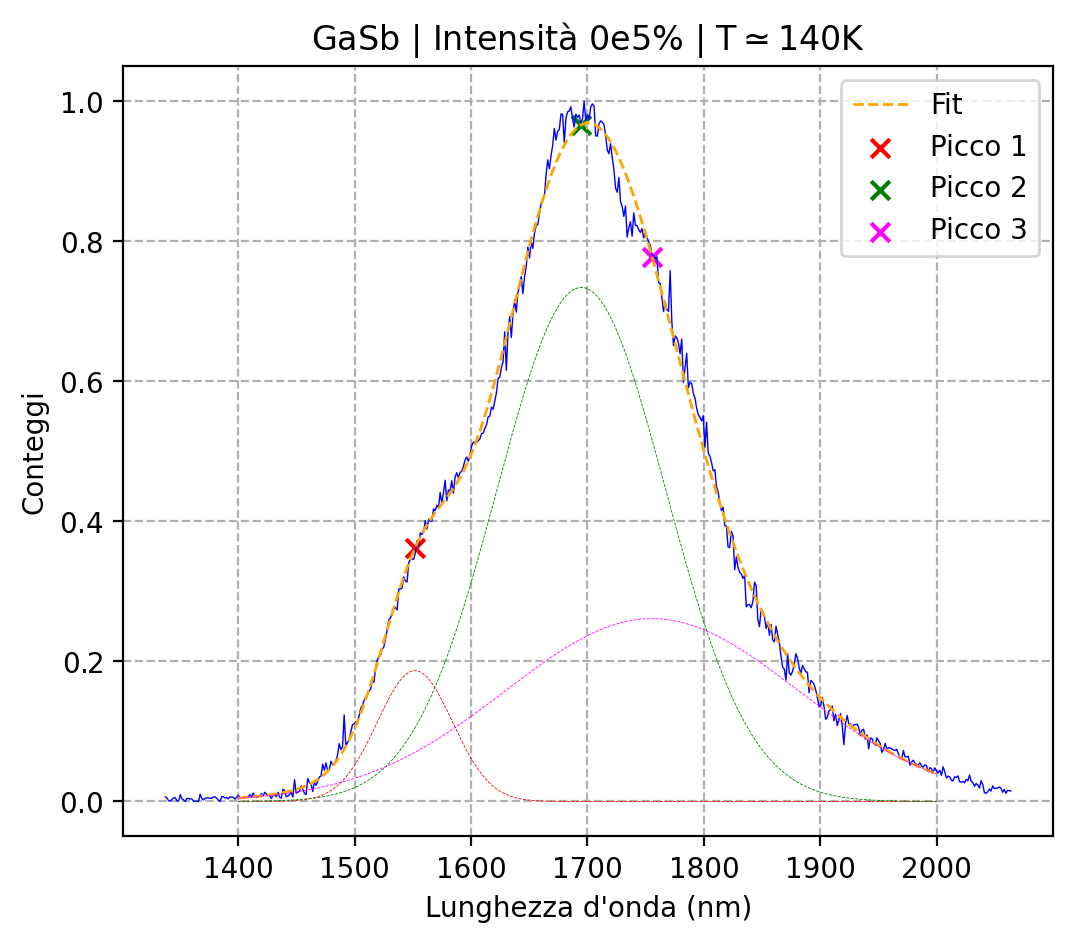

• Gaussiana  1
 - A = 0.1867743551368698
 - mu = 1551.8715991615925
 - sigma = 32.354012724270206
• Gaussiana  2
 - A = 0.7342641741401219
 - mu = 1694.7841403332068
 - sigma = 72.45782726174775
• Gaussiana  3
 - A = 0.26116120231286155
 - mu = 1755.4783100856382
 - sigma = 125.61856737432099
 - chi2rid = 0.2172156507430688


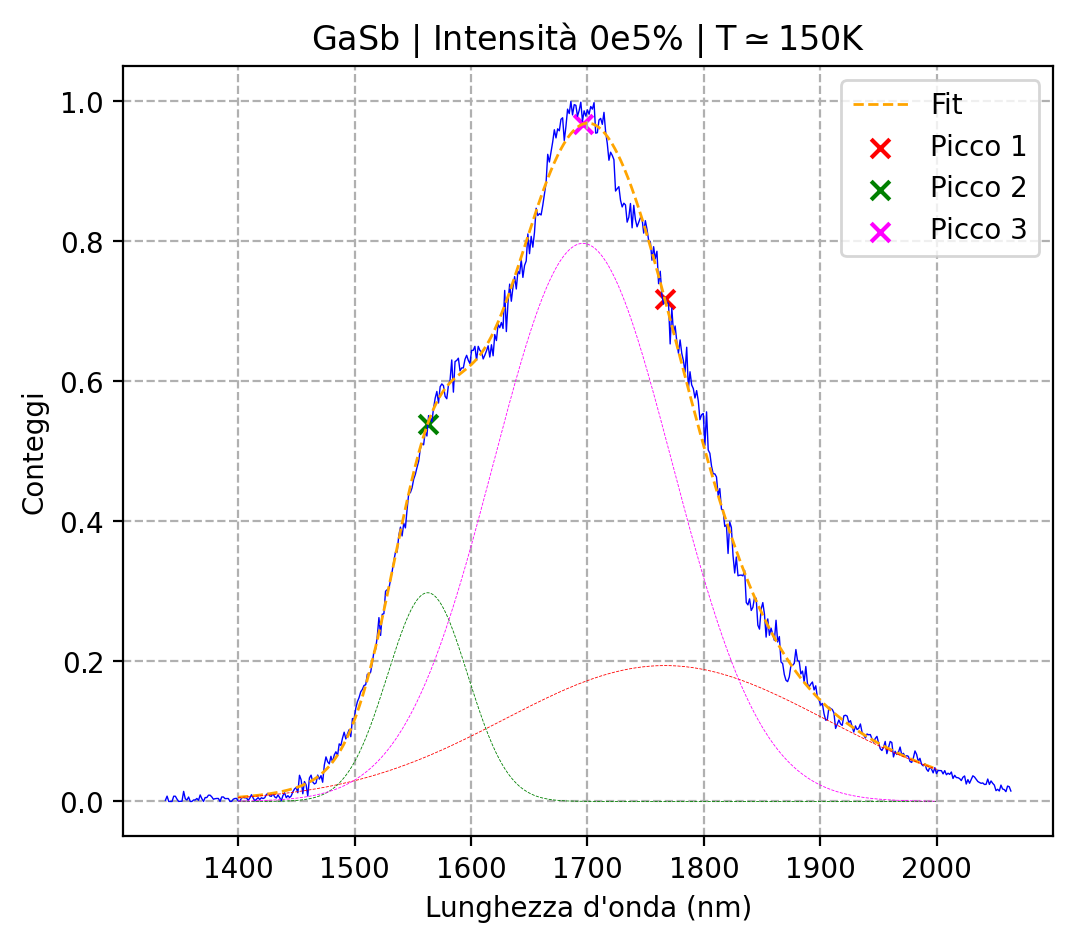

• Gaussiana  1
 - A = 0.19411021328406358
 - mu = 1766.5495731779838
 - sigma = 137.48141408098402
• Gaussiana  2
 - A = 0.29813445425082974
 - mu = 1562.7863593522738
 - sigma = 34.431800154581154
• Gaussiana  3
 - A = 0.7972701816773633
 - mu = 1696.0698915160915
 - sigma = 76.74470684729506
 - chi2rid = 0.4818747923270406


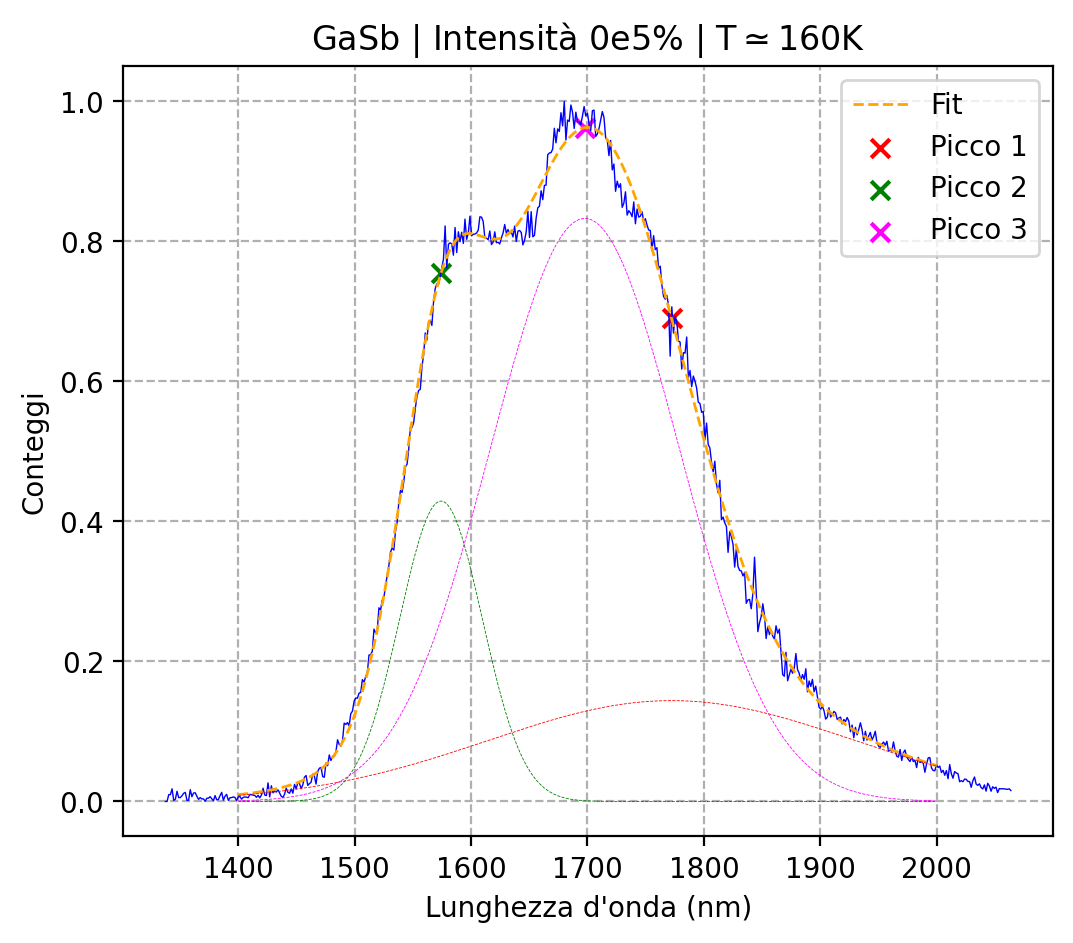

• Gaussiana  1
 - A = 0.14403418896216183
 - mu = 1772.2615414501029
 - sigma = 157.10251577536238
• Gaussiana  2
 - A = 0.4290682688775212
 - mu = 1574.2598170218346
 - sigma = 35.60211821267306
• Gaussiana  3
 - A = 0.8328855041467967
 - mu = 1697.7930466772711
 - sigma = 81.01741053545048
 - chi2rid = 0.26892328210828004


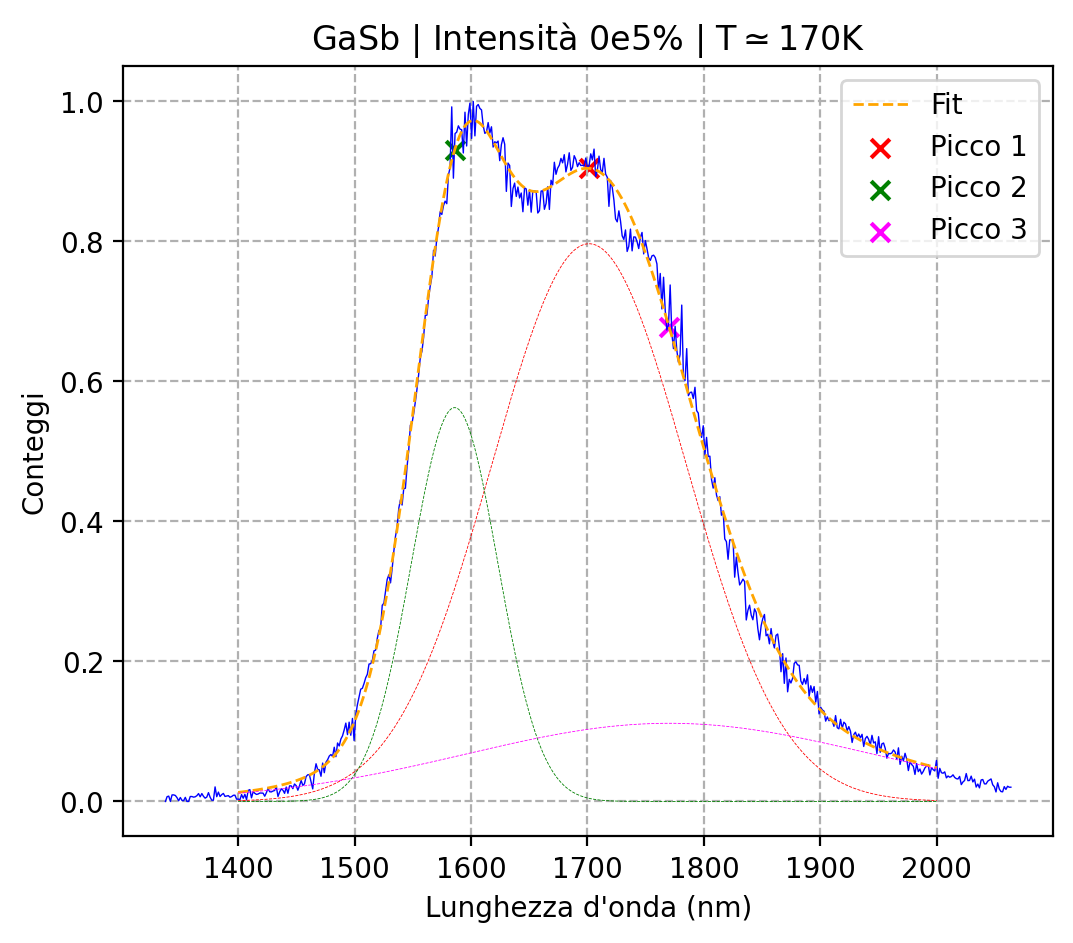

• Gaussiana  1
 - A = 0.7967276369385282
 - mu = 1701.3871308526911
 - sigma = 83.18401859783967
• Gaussiana  2
 - A = 0.5625891556282192
 - mu = 1585.974126603602
 - sigma = 37.07441817059283
• Gaussiana  3
 - A = 0.11166330667285003
 - mu = 1770.2634362220454
 - sigma = 174.53931506898047
 - chi2rid = 0.35817185484019426


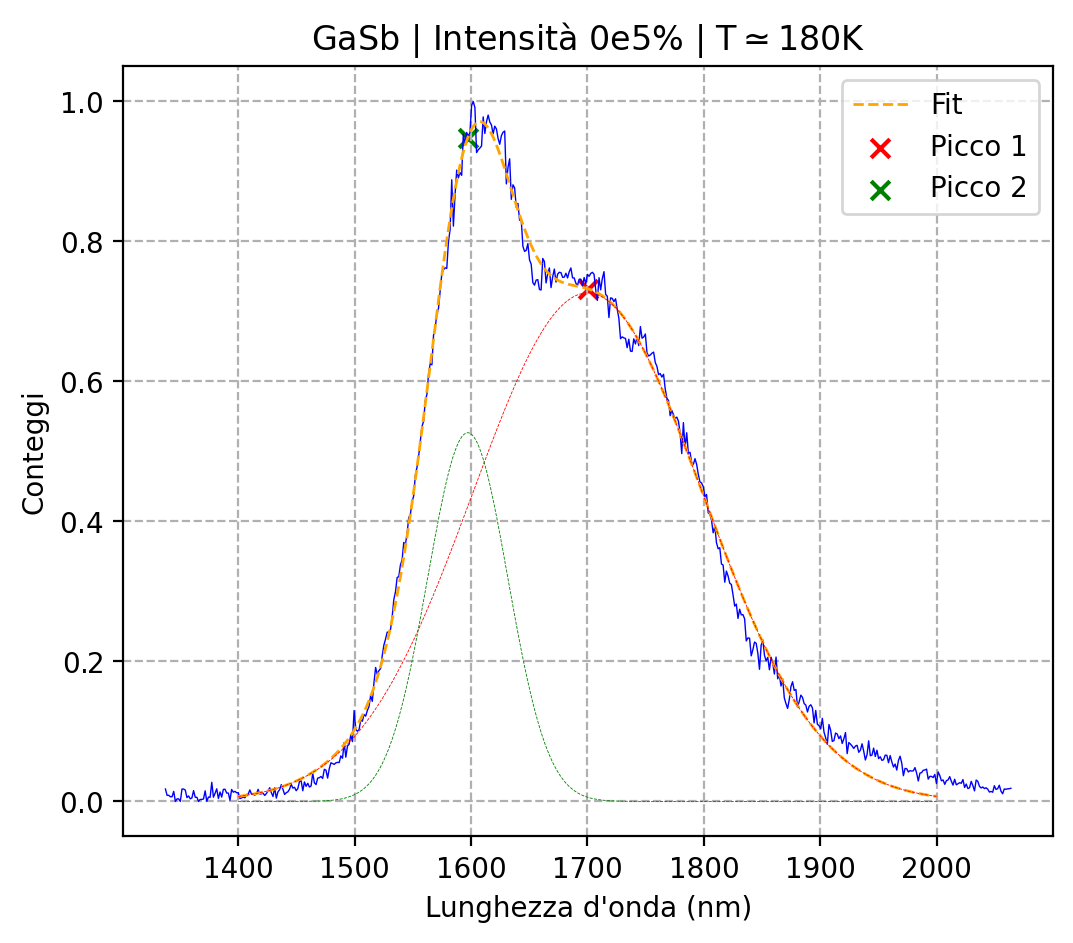

• Gaussiana  1
 - A = 0.7264787464691337
 - mu = 1700.1893479209543
 - sigma = 98.65617556597404
• Gaussiana  2
 - A = 0.5267433909613883
 - mu = 1597.231254800451
 - sigma = 34.41155209348933
 - chi2rid = 0.8385299176254245


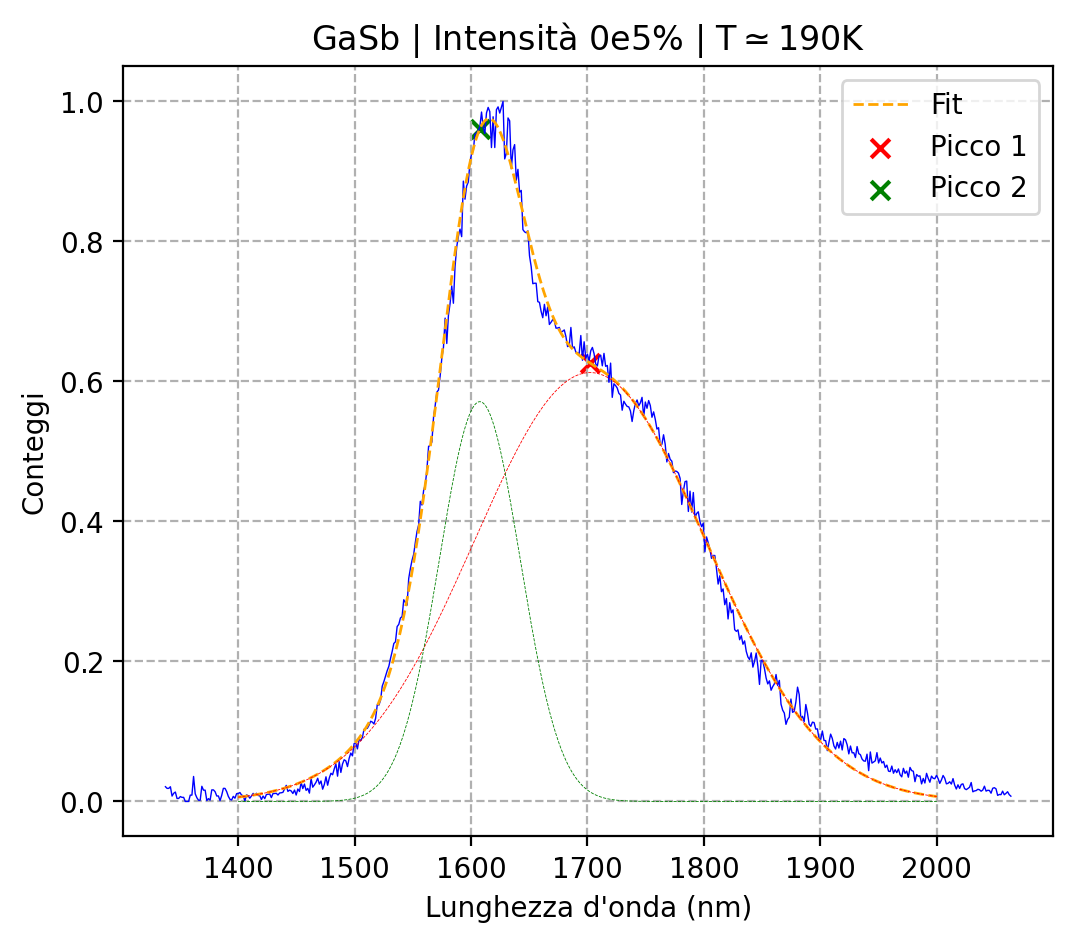

• Gaussiana  1
 - A = 0.6126856999202159
 - mu = 1702.3187498937816
 - sigma = 99.59084905542487
• Gaussiana  2
 - A = 0.57107846485898
 - mu = 1607.5749214380514
 - sigma = 34.65257066996759
 - chi2rid = 0.7794539300912914


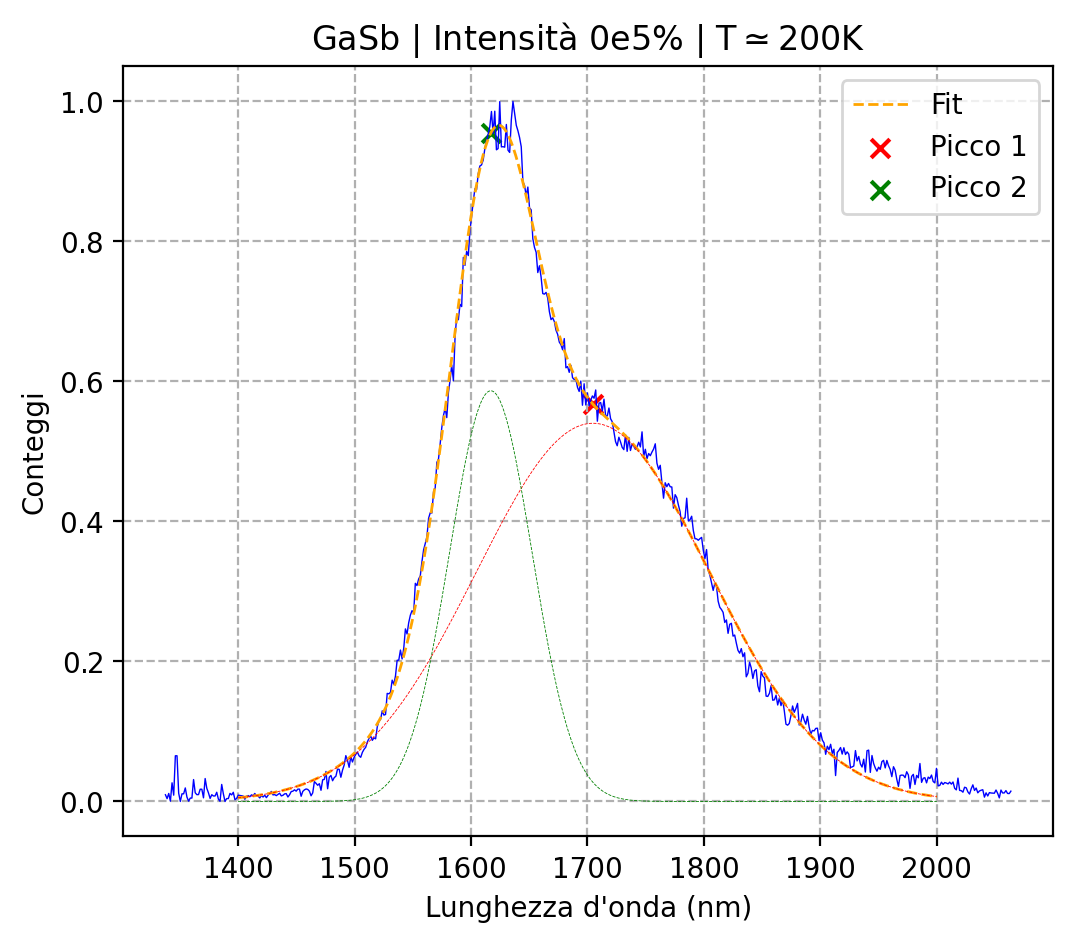

• Gaussiana  1
 - A = 0.5402536943709536
 - mu = 1704.6883981305346
 - sigma = 100.11201987572987
• Gaussiana  2
 - A = 0.5866890434847764
 - mu = 1617.0301480392097
 - sigma = 35.40516674232228
 - chi2rid = 0.6593340976315684


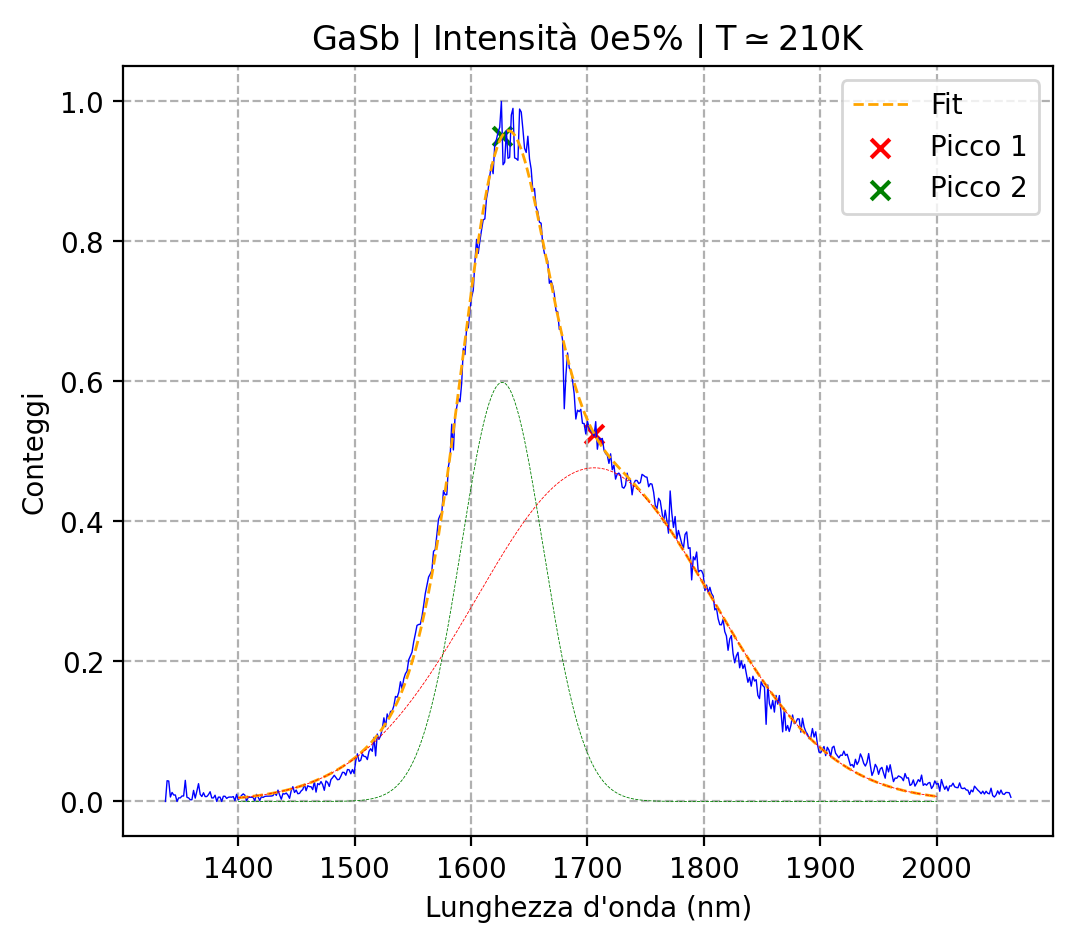

• Gaussiana  1
 - A = 0.47662194973432237
 - mu = 1705.8280428891655
 - sigma = 101.56672322359503
• Gaussiana  2
 - A = 0.5986746843152272
 - mu = 1626.7970971643467
 - sigma = 35.230594042580776
 - chi2rid = 0.5980265209553357


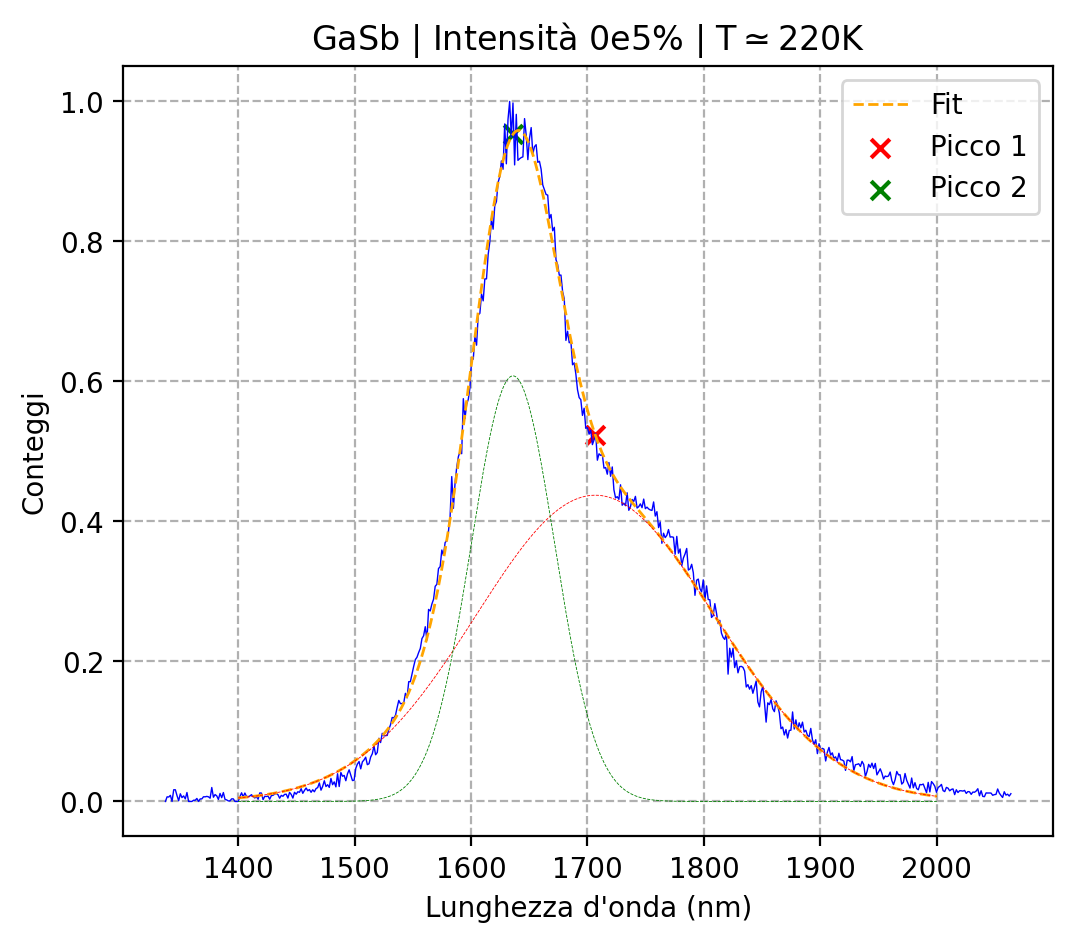

• Gaussiana  1
 - A = 0.4374832582242629
 - mu = 1706.6976956789538
 - sigma = 102.56102086973311
• Gaussiana  2
 - A = 0.6079711637738912
 - mu = 1636.0690571506193
 - sigma = 35.72194856571798
 - chi2rid = 0.5460231671606147


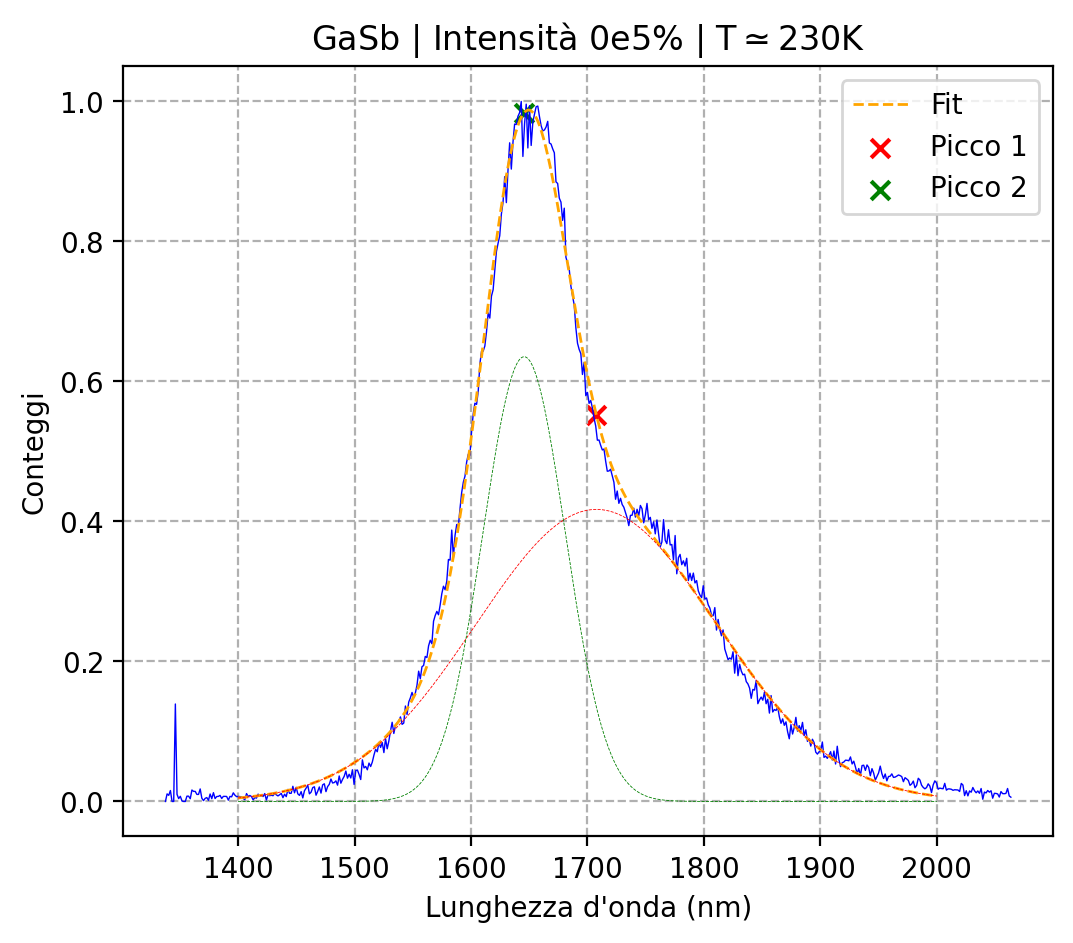

• Gaussiana  1
 - A = 0.4172075154658465
 - mu = 1707.6892035791197
 - sigma = 103.4631417053159
• Gaussiana  2
 - A = 0.6353192669975639
 - mu = 1645.654218465767
 - sigma = 35.22571854747573
 - chi2rid = 0.5721081998230709


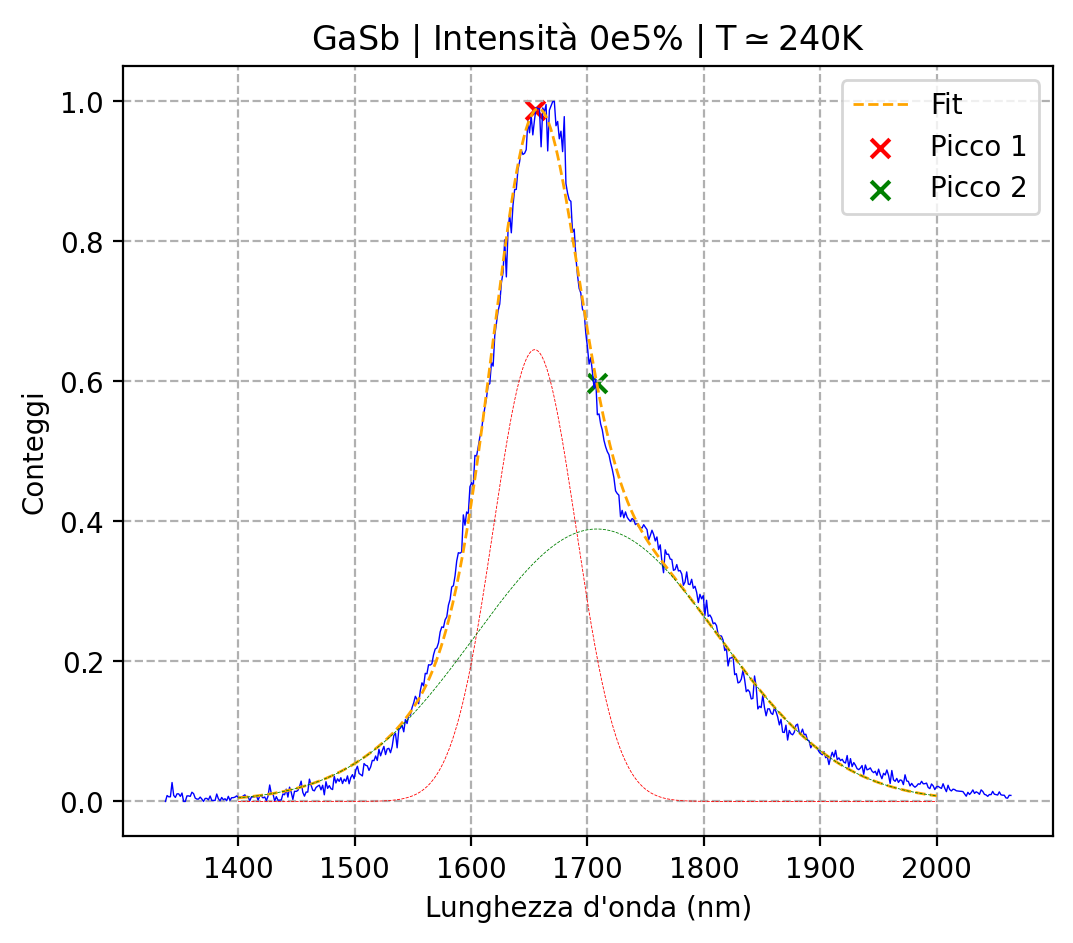

• Gaussiana  1
 - A = 0.6453877880947776
 - mu = 1654.7482330951411
 - sigma = 35.41658891357591
• Gaussiana  2
 - A = 0.3891831921796958
 - mu = 1708.0588230057049
 - sigma = 104.67342339222867
 - chi2rid = 0.8561582877173913


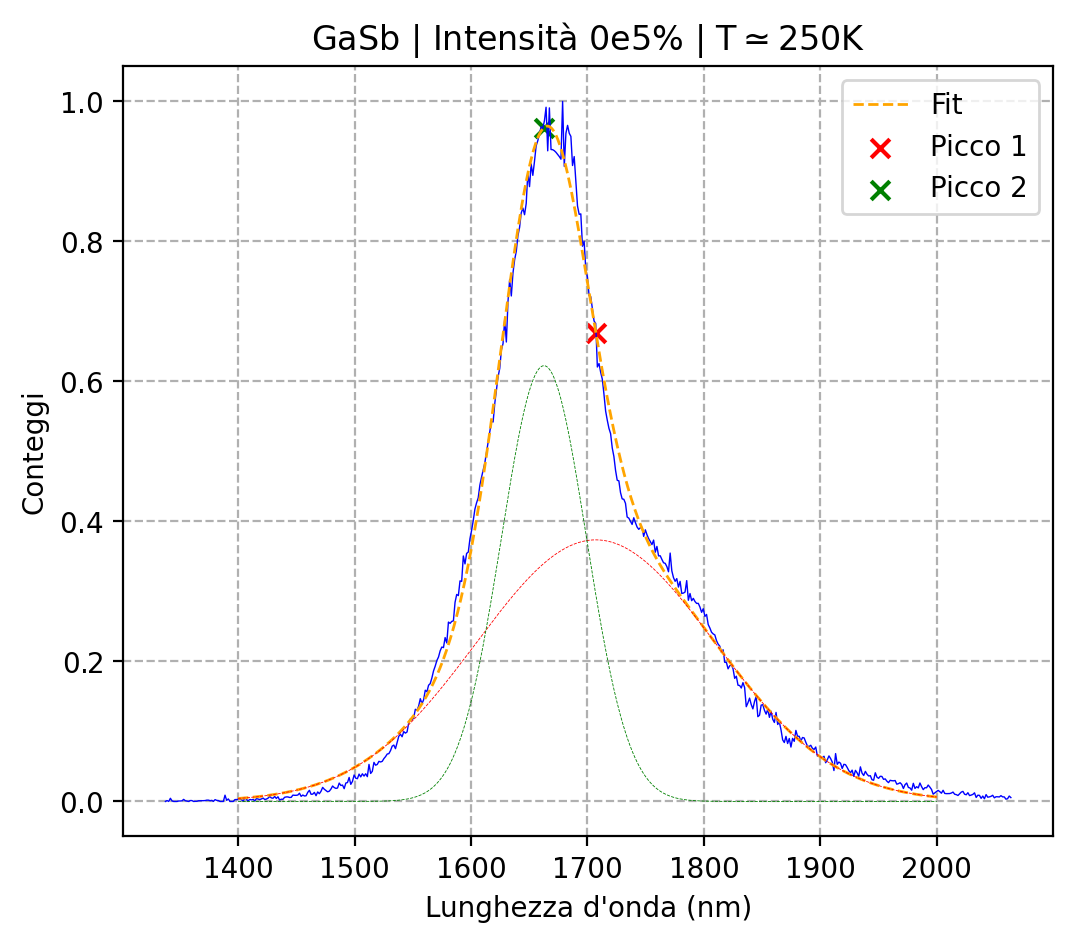

• Gaussiana  1
 - A = 0.3737017272263372
 - mu = 1707.1285820809333
 - sigma = 102.54626805856961
• Gaussiana  2
 - A = 0.6225086873074058
 - mu = 1662.6793811552868
 - sigma = 36.45443883439641
 - chi2rid = 0.68455919232553


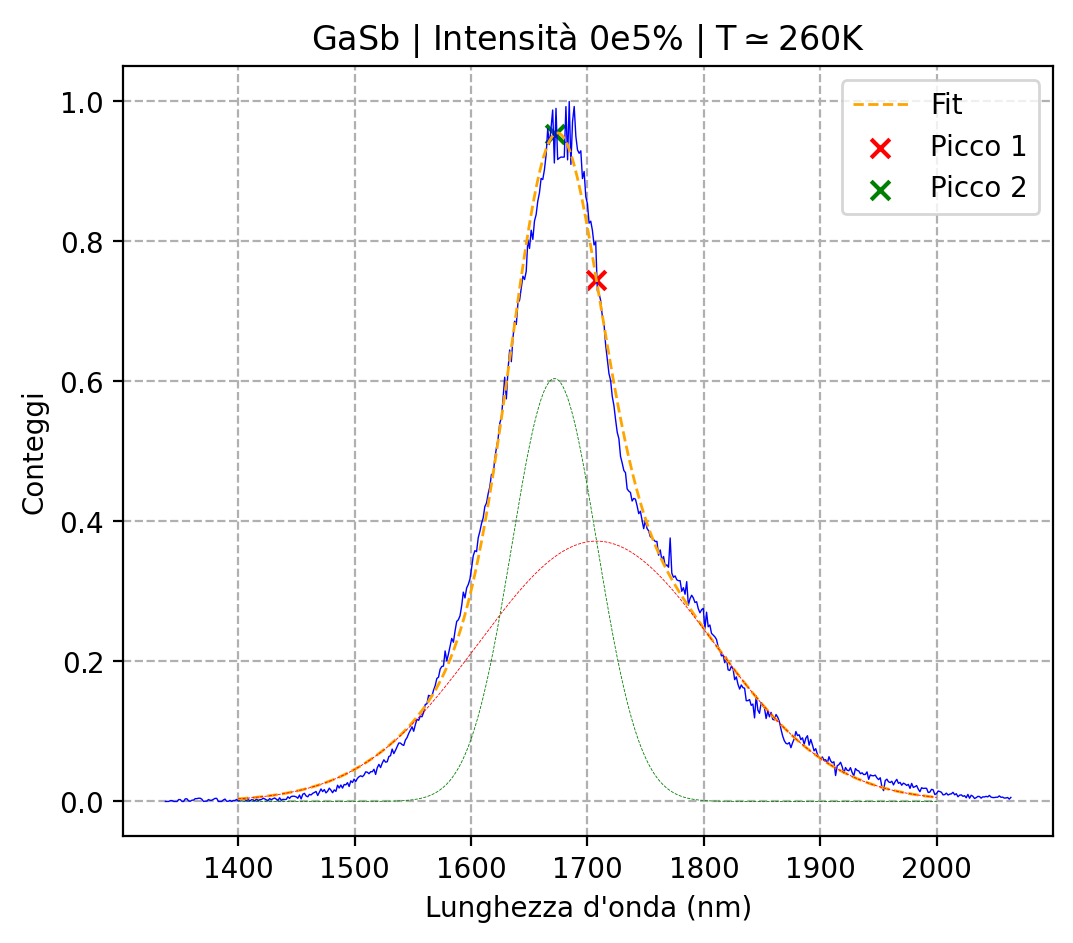

• Gaussiana  1
 - A = 0.3718956901788171
 - mu = 1707.7004442614464
 - sigma = 101.44122899050228
• Gaussiana  2
 - A = 0.6040891197823153
 - mu = 1671.7830410228817
 - sigma = 36.650585587182135
 - chi2rid = 0.8046768986584117


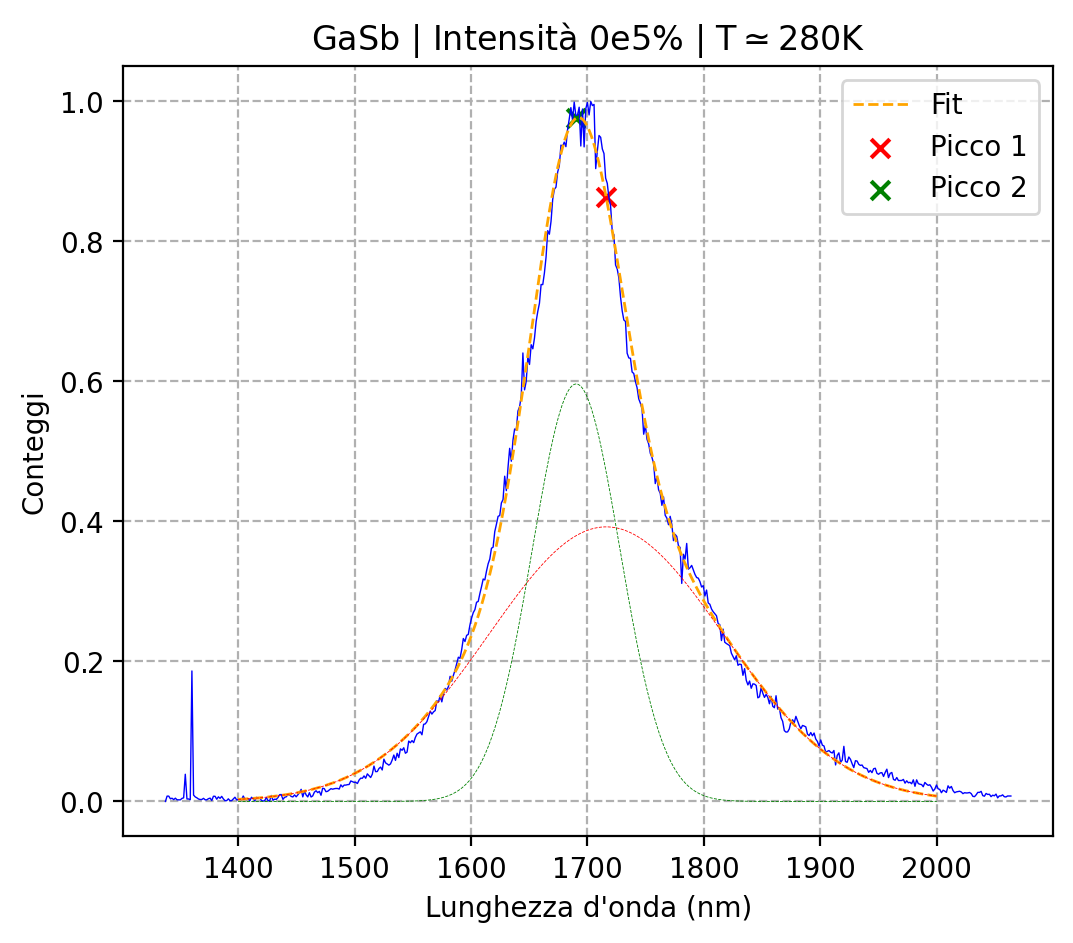

• Gaussiana  1
 - A = 0.39225997991742545
 - mu = 1716.105515755055
 - sigma = 101.06895512694943
• Gaussiana  2
 - A = 0.5963796168516099
 - mu = 1690.3283478885942
 - sigma = 37.47140183807426
 - chi2rid = 0.5508856556531782


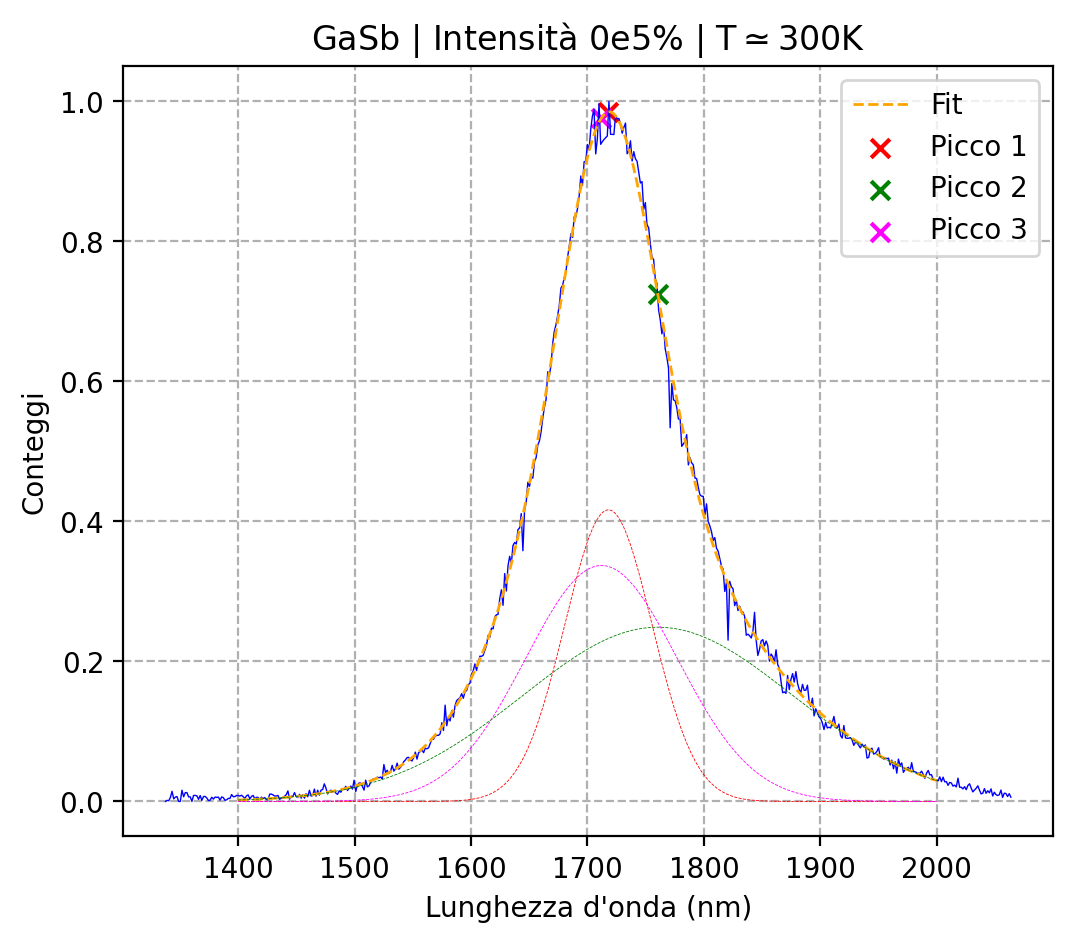

• Gaussiana  1
 - A = 0.41654997608292854
 - mu = 1718.031912354462
 - sigma = 37.47148624312927
• Gaussiana  2
 - A = 0.2488945103923411
 - mu = 1760.4219844535985
 - sigma = 116.22913587809654
• Gaussiana  3
 - A = 0.3370503658490143
 - mu = 1712.0803290399554
 - sigma = 65.06519323668499
 - chi2rid = 0.16746085265406008


In [13]:
for T in arr_T:
    
    waveln = GaSb_T[T][0]
    counts = GaSb_T[T][1]
    
    # normalizzo i counts
    maximum = np.max(counts)
    counts = counts / maximum

    # Plot
    plt.figure(figsize=(6,5), dpi=200)
    plt.plot(waveln, counts, linestyle='-', color='b', linewidth=0.5)#, zorder=1)
    
    ## FIT ##
    
    # isolo regione 1400 < x < 2000
    mask = (waveln > 1400) & (waveln < 2000)
    x_fit = waveln[mask]
    y_fit = counts[mask]
    
    # imposto parametri: ogni entrata è una tripla (a, mu, sigma)
    params = [
        (1, 1650, 50)
    ]
    
    # 'Appiattisco' la lista dei parametri iniziali
    par_flattened = np.array(params).flatten()
    
    # Set dei bounds
    low = [0.01, 1500, 10] * len(params)  # Es: A >= 0, mu >= 1500, sigma >= 10
    upp = [1, 1900, 200] * len(params)  # Limiti superiori
    
    popt, pcov, chi2_reduced = fit_N_gaussiane(x_fit, y_fit, params, bounds=(low,upp), N_MAX_GAUSS=3)
        
    ## PLOT CURVA FIT ##
    x_plot = np.linspace(1400, 2000, 600)
    y_plot = N_gaussiane(x_plot, *popt)
    plt.plot(x_plot, y_plot, linestyle='--', color='orange', label=f"Fit", linewidth=1)#, zorder=2)
    
    # plotto anche i picchi individuati dal fit
    for i in range(0, round(len(popt)/3)): 
        x_picco = popt[3*i+1]
        y_picco = N_gaussiane(x_picco, *popt)
        plt.scatter(x_picco, y_picco, 
                    color=col[i], marker='x',
                    label='Picco '+str(i+1),
                    s=45, #alpha=0-1 per opacità
                    #zorder=3
                    )
        
    # plotto singolarmente le gaussiane
    for i in range(0, round(len(popt)/3)):
        y_gauss = gaussiana(x_plot, popt[3*i], popt[3*i+1], popt[3*i+2])
        plt.plot(x_plot, y_gauss, linestyle='--', color=col[i], linewidth=0.3, zorder=2)
    
    ## OPZIONI GRAFICHE ##
    plt.title(r'GaSb | Intensità 0e5% | T$\simeq$' + T + r'K')
    plt.xlabel("Lunghezza d'onda (nm)")
    plt.ylabel("Conteggi")
    plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
    plt.legend()
    plt.grid(linestyle='--')
    #plt.tight_layout()
    plt.show()
    
    ## PRINT RISULTATI FIT ##
    for i in range(0, round(len(popt)/3)):
        print('• Gaussiana ', i+1)
        print(' - A =', popt[3*i])
        print(' - mu =', popt[3*i+1])
        print(' - sigma =', popt[3*i+2])
    print(' - chi2rid =', chi2_reduced)
    
    
    # estraggo da popt i parametri da usare per la prossima gaussiana
    params = [] # inizializzo
    for i in range(0, round(len(popt)/3)):
        params.append((popt[3*i], popt[3*i+1], popt[3*i+2]))

---

---